In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json
import pandas as pd

file_dir = "/data03/sunyi/time_constrained_cot/outputs/2_6"
model_list = [
    "NovaSky-AI/Sky-T1-32B-Preview",
    "Qwen/QwQ-32B-Preview",
    "Qwen/Qwen2.5-32B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-7B-Instruct",
    # "internlm/internlm2_5-1_8b-chat",
    # "internlm/internlm2_5-7b-chat",
    # "internlm/internlm2_5-20b-chat",
    "mistralai/Mistral-Small-Instruct-2409",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "mistralai/Ministral-8B-Instruct-2410",
    "mistralai/Mathstral-7B-v0.1",
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",

    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
    "microsoft/phi-4",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.1-8B-Instruct"
]
o1_like_models = [
    "Qwen/QwQ-32B-Preview", 
    "NovaSky-AI/Sky-T1-32B-Preview", 
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
]

no_o1_models = [
    "Qwen/Qwen2.5-32B-Instruct", 
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-7B-Instruct",
    
    "mistralai/Mistral-Small-Instruct-2409",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "mistralai/Ministral-8B-Instruct-2410",
    "mistralai/Mathstral-7B-v0.1",
    
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",
    
    "microsoft/phi-4",
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
    
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.1-8B-Instruct"
]

model_list = o1_like_models + no_o1_models

PROMP_LIST = [ "-c2f", "-sbs", "-aav"]


In [2]:
MODEL_SERIES_MAP = {
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
    
    "meta-llama/Llama-3.2-3B-Instruct": "llama",
    "meta-llama/Llama-3.2-1B-Instruct": "llama",
    "meta-llama/Llama-3.1-8B-Instruct": "llama"
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST],
    "llama": ["llama"+prompt for prompt in PROMP_LIST]
}

In [3]:
def gen_budget_list(budget, data_name, model):
    if budget == -1:
        return [-1]
    elif budget == 1:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models: # maybe should extend to longer sequence
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 601, 50):
                    budget_list.append(i)
                # for i in range(600, 1201, 100):
                #     budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 601, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
        
        return budget_list


In [4]:
dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"

In [5]:
model_acc_dicts = {}
prompt_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

display(model_acc_dicts)

{'Qwen/QwQ-32B-Preview': {'qwen-c2f': [36.4,
   41.0,
   46.4,
   52.5,
   60.0,
   64.9,
   70.7,
   75.5,
   78.5,
   80.7,
   85.1,
   86.5,
   90.2,
   91.5,
   93.3,
   94.3,
   94.8,
   95.2],
  'qwen-sbs': [35.4,
   36.2,
   36.5,
   37.5,
   41.5,
   45.7,
   51.0,
   60.0,
   65.8,
   71.0,
   75.7,
   80.1,
   84.8,
   89.0,
   91.0,
   93.7,
   94.5,
   94.6],
  'qwen-aav': [38.5,
   40.3,
   45.6,
   49.5,
   53.1,
   60.9,
   66.9,
   73.3,
   78.1,
   81.0,
   84.8,
   88.4,
   91.1,
   93.1,
   94.0,
   94.6,
   94.9,
   94.8]},
 'NovaSky-AI/Sky-T1-32B-Preview': {'qwen-c2f': [38.7,
   44.6,
   50.2,
   56.0,
   62.9,
   70.0,
   76.1,
   82.6,
   85.4,
   87.6,
   90.0,
   90.8,
   92.6,
   93.6,
   94.5,
   94.7,
   94.6,
   94.8],
  'qwen-sbs': [37.3,
   38.4,
   40.7,
   44.0,
   50.9,
   58.5,
   65.0,
   72.6,
   77.6,
   81.4,
   85.8,
   89.0,
   92.6,
   94.2,
   95.6,
   96.0,
   95.9,
   95.8],
  'qwen-aav': [39.3,
   46.6,
   59.2,
   69.5,
   77.9,
   83.7,
 

{'Qwen/QwQ-32B-Preview': {'qwen-c2f': [34.8,
   37.6,
   37.2,
   38.6,
   38.8,
   40.2,
   39.8,
   44.6,
   45.0,
   48.0,
   49.8,
   50.4,
   52.0,
   53.4,
   55.8,
   57.8,
   57.4,
   60.8,
   61.0,
   61.2,
   63.8,
   65.0,
   65.8,
   68.2,
   69.6,
   72.4,
   74.6,
   76.6,
   79.2,
   80.4],
  'qwen-sbs': [33.0,
   34.8,
   34.2,
   34.8,
   34.6,
   35.4,
   35.0,
   35.6,
   37.6,
   38.8,
   40.8,
   41.6,
   46.6,
   46.4,
   47.8,
   50.6,
   53.0,
   54.0,
   56.6,
   56.8,
   56.6,
   60.0,
   60.6,
   62.4,
   66.4,
   69.2,
   74.4,
   74.0,
   77.6,
   79.4],
  'qwen-aav': [35.0,
   36.6,
   35.2,
   37.0,
   37.2,
   37.2,
   39.8,
   42.6,
   43.6,
   45.6,
   48.2,
   49.4,
   52.2,
   55.0,
   54.8,
   56.8,
   58.4,
   60.6,
   62.0,
   64.2,
   64.0,
   64.6,
   66.8,
   68.8,
   72.2,
   75.0,
   76.4,
   78.2,
   78.4,
   80.8]},
 'NovaSky-AI/Sky-T1-32B-Preview': {'qwen-c2f': [37.4,
   36.8,
   38.4,
   40.4,
   43.2,
   42.8,
   46.8,
   49.8,
   50.4,


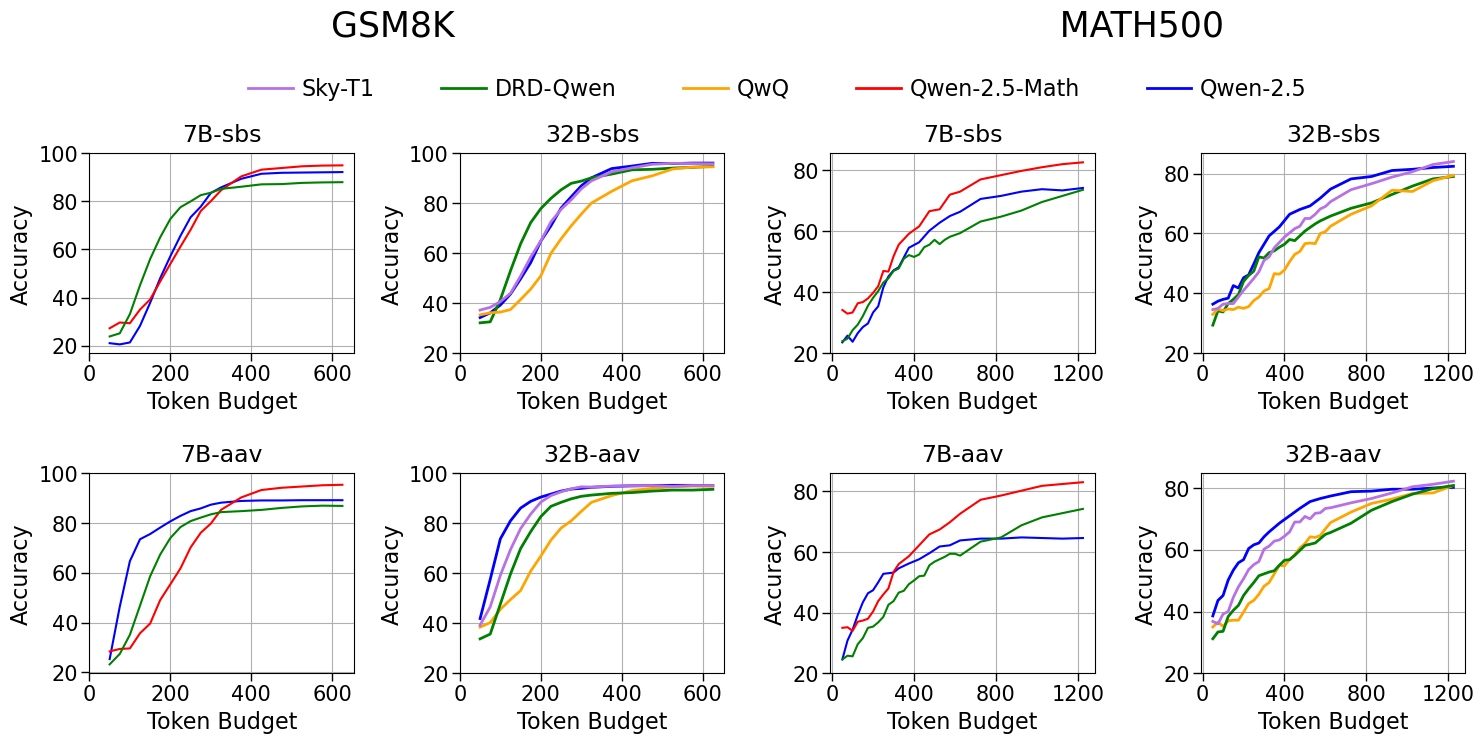

In [6]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

budget_list = gen_budget_list(1, dataset, "Qwen/Qwen2.5-1.5B-Instruct")
budget_list2 = gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-1.5B-Instruct")
budget_list3 = gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")
budget_list4 = gen_budget_list(1, dataset, "Qwen/Qwen2.5-7B-Instruct")
budget_list5 = gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-7B-Instruct")
budget_list6 = gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B")
budget_list7 = gen_budget_list(1, dataset, "Qwen/Qwen2.5-14B-Instruct")
budget_list8 = gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B")
budget_list9 = gen_budget_list(1, dataset, "Qwen/Qwen2.5-32B-Instruct")
budget_list10 = gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B")
budget_list11 = gen_budget_list(1, dataset, "Qwen/QwQ-32B-Preview")
budget_list12 = gen_budget_list(1, dataset, "NovaSky-AI/Sky-T1-32B-Preview")

# axs[0, 0].set_title("Gsm8k", fontsize=20, y=1.2)
# axs[0, 1].set_title("Math500", fontsize=20, y=1.2)
# axs[0].set_title("sbs", fontsize=20, y=1.05)
axs[0, 0].set_title("7B-sbs", fontsize=17, y=1.02)
# axs[2].set_title("aav", fontsize=20, y=1.05)
axs[0, 1].set_title("32B-sbs", fontsize=17, y=1.02)
axs[1, 0].set_title("7B-aav", fontsize=17, y=1.02)
axs[1, 1].set_title("32B-aav", fontsize=17, y=1.02)

axs[0,1].plot([budget + 25 for budget in budget_list9], model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]["qwen-sbs"], label="Instruct", color="blue", linewidth=2)
axs[0,1].plot([budget + 25 for budget in budget_list10], model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-32B"]["deepseek-r1-distill-sbs"], label="DRD", color="green", linewidth=2)
axs[0,1].plot([budget + 25 for budget in budget_list11], model_acc_dicts["Qwen/QwQ-32B-Preview"]["qwen-sbs"], label="QwQ", color="orange", linewidth=2)
axs[0,1].plot([budget + 25 for budget in budget_list12], model_acc_dicts["NovaSky-AI/Sky-T1-32B-Preview"]["qwen-sbs"], label="Sky-T1", color="#B771E5", linewidth=2)
# axs[0,1].legend(loc="lower right", fontsize=12)
axs[0,1].set_yticks(range(20, 101, 20)) 
axs[0,1].tick_params(
    axis='y',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[0,1].set_xticks(range(0, 601, 200)) 
axs[0,1].tick_params(
    axis='x',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[0,1].set_xlabel("Token Budget", fontsize=16)
axs[0,1].set_ylabel("Accuracy", fontsize=16) 
axs[0,1].grid(True)

# plot for qwen2.5-32B, include instruction, deepseek-r1-distill, QwQ and Sky-T1-32B
axs[1,1].plot([budget + 25 for budget in budget_list9], model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]["qwen-aav"], label="Instruct", color="blue", linewidth=2)
axs[1,1].plot([budget + 25 for budget in budget_list11], model_acc_dicts["Qwen/QwQ-32B-Preview"]["qwen-aav"], label="QwQ", color="orange", linewidth=2)
axs[1,1].plot([budget + 25 for budget in budget_list12], model_acc_dicts["NovaSky-AI/Sky-T1-32B-Preview"]["qwen-aav"], label="Sky-T1", color="#B771E5", linewidth=2)
axs[1,1].plot([budget + 25 for budget in budget_list10], model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-32B"]["deepseek-r1-distill-aav"], label="DRD", color="green", linewidth=2)
# axs[1,1].legend(loc="lower right", fontsize=12)
axs[1,1].set_yticks(range(20, 101, 20)) 
axs[1,1].tick_params(
    axis='y',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[1,1].set_xticks(range(0, 601, 200)) 
axs[1,1].tick_params(
    axis='x',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
) 
axs[1,1].set_xlabel("Token Budget", fontsize=16)
axs[1,1].set_ylabel("Accuracy", fontsize=16)
axs[1,1].grid(True)

axs[0, 0].plot([budget + 25 for budget in budget_list4], model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]["qwen-sbs"], label="Instruct", color="blue")
axs[0, 0].plot([budget + 25 for budget in budget_list5], model_acc_dicts["Qwen/Qwen2.5-Math-7B-Instruct"]["qwen-math-sbs"], label="Math", color="red")
axs[0, 0].plot([budget + 25 for budget in budget_list6], model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"]["deepseek-r1-distill-sbs"], label="DRD", color="green")
# axs[0, 0].legend(loc="lower right", fontsize=12)
axs[0, 0].set_yticks(range(20, 101, 20)) 
axs[0, 0].tick_params(
    axis='y',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[0, 0].set_xticks(range(0, 601, 200)) 
axs[0, 0].tick_params(
    axis='x',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
) 
axs[0, 0].set_xlabel("Token Budget", fontsize=16)
axs[0, 0].set_ylabel("Accuracy", fontsize=16)
axs[0, 0].grid(True)

axs[1,0].plot([budget + 25 for budget in budget_list4], model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]["qwen-aav"], label="Instruct", color="blue")
axs[1,0].plot([budget + 25 for budget in budget_list5], model_acc_dicts["Qwen/Qwen2.5-Math-7B-Instruct"]["qwen-math-aav"], label="Math", color="red")
axs[1,0].plot([budget + 25 for budget in budget_list6], model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"]["deepseek-r1-distill-aav"], label="DRD", color="green")
# axs[1,0].legend(loc="lower right", fontsize=12)
axs[1,0].set_yticks(range(20, 101, 20))
axs[1,0].tick_params(
    axis='y',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[1,0].set_xticks(range(0, 601, 200))
axs[1,0].tick_params(
    axis='x',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[1,0].set_xlabel("Token Budget", fontsize=16)
axs[1,0].set_ylabel("Accuracy", fontsize=16)
axs[1,0].grid(True)

dataset = "math500"
something = "_-1_seed0_t0.0_s0_e-1"
model_acc_dicts = {}
prompt_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

display(model_acc_dicts)

# axs[0, 0].set_title("Gsm8k", fontsize=20, y=1.2)
# axs[0, 1].set_title("Math500", fontsize=20, y=1.2)
# axs[0].set_title("sbs", fontsize=20, y=1.05)
axs[0, 2].set_title("7B-sbs", fontsize=17, y=1.02)
# axs[2].set_title("aav", fontsize=20, y=1.05)
axs[0, 3].set_title("32B-sbs", fontsize=17, y=1.02)
axs[1, 2].set_title("7B-aav", fontsize=17, y=1.02)
axs[1, 3].set_title("32B-aav", fontsize=17, y=1.02)

budget_list = gen_budget_list(1, dataset, "Qwen/Qwen2.5-1.5B-Instruct")
budget_list2 = gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-1.5B-Instruct")
budget_list3 = gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")
budget_list4 = gen_budget_list(1, dataset, "Qwen/Qwen2.5-7B-Instruct")
budget_list5 = gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-7B-Instruct")
budget_list6 = gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B")
budget_list7 = gen_budget_list(1, dataset, "Qwen/Qwen2.5-14B-Instruct")
budget_list8 = gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B")
budget_list9 = gen_budget_list(1, dataset, "Qwen/Qwen2.5-32B-Instruct")
budget_list10 = gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B")
budget_list11 = gen_budget_list(1, dataset, "Qwen/QwQ-32B-Preview")
budget_list12 = gen_budget_list(1, dataset, "NovaSky-AI/Sky-T1-32B-Preview")

axs[0,3].plot([budget + 25 for budget in budget_list9], model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]["qwen-sbs"], label="Instruct", color="blue", linewidth=2)
axs[0,3].plot([budget + 25 for budget in budget_list10], model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-32B"]["deepseek-r1-distill-sbs"], label="DRD", color="green", linewidth=2)
axs[0,3].plot([budget + 25 for budget in budget_list11], model_acc_dicts["Qwen/QwQ-32B-Preview"]["qwen-sbs"], label="QwQ", color="orange", linewidth=2)
axs[0,3].plot([budget + 25 for budget in budget_list12], model_acc_dicts["NovaSky-AI/Sky-T1-32B-Preview"]["qwen-sbs"], label="Sky-T1", color="#B771E5", linewidth=2)
# axs[0,1].legend(loc="lower right", fontsize=12)
axs[0,3].set_yticks(range(20, 85, 20)) 
axs[0,3].tick_params(
    axis='y',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[0,3].set_xticks(range(0, 1201, 400)) 
axs[0,3].tick_params(
    axis='x',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[0,3].set_xlabel("Token Budget", fontsize=16)
axs[0,3].set_ylabel("Accuracy", fontsize=16) 
axs[0,3].grid(True)

# plot for qwen2.5-32B, include instruction, deepseek-r1-distill, QwQ and Sky-T1-32B
axs[1,3].plot([budget + 25 for budget in budget_list9], model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]["qwen-aav"], label="Instruct", color="blue", linewidth=2)
axs[1,3].plot([budget + 25 for budget in budget_list11], model_acc_dicts["Qwen/QwQ-32B-Preview"]["qwen-aav"], label="QwQ", color="orange", linewidth=2)
axs[1,3].plot([budget + 25 for budget in budget_list12], model_acc_dicts["NovaSky-AI/Sky-T1-32B-Preview"]["qwen-aav"], label="Sky-T1", color="#B771E5", linewidth=2)
axs[1,3].plot([budget + 25 for budget in budget_list10], model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-32B"]["deepseek-r1-distill-aav"], label="DRD", color="green", linewidth=2)
# axs[1,1].legend(loc="lower right", fontsize=12)
axs[1,3].set_yticks(range(20, 85, 20)) 
axs[1,3].tick_params(
    axis='y',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[1,3].set_xticks(range(0, 1201, 400)) 
axs[1,3].tick_params(
    axis='x',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
) 
axs[1,3].set_xlabel("Token Budget", fontsize=16)
axs[1,3].set_ylabel("Accuracy", fontsize=16)
axs[1,3].grid(True)

axs[0, 2].plot([budget + 25 for budget in budget_list4], model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]["qwen-sbs"], label="Instruct", color="blue")
axs[0, 2].plot([budget + 25 for budget in budget_list5], model_acc_dicts["Qwen/Qwen2.5-Math-7B-Instruct"]["qwen-math-sbs"], label="Math", color="red")
axs[0, 2].plot([budget + 25 for budget in budget_list6], model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"]["deepseek-r1-distill-sbs"], label="DRD", color="green")
# axs[0, 0].legend(loc="lower right", fontsize=12)
axs[0, 2].set_yticks(range(20, 85, 20)) 
axs[0, 2].tick_params(
    axis='y',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[0, 2].set_xticks(range(0, 1201, 400)) 
axs[0, 2].tick_params(
    axis='x',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
) 
axs[0, 2].set_xlabel("Token Budget", fontsize=16)
axs[0, 2].set_ylabel("Accuracy", fontsize=16)
axs[0, 2].grid(True)

axs[1,2].plot([budget + 25 for budget in budget_list4], model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]["qwen-aav"], label="Instruct", color="blue")
axs[1,2].plot([budget + 25 for budget in budget_list5], model_acc_dicts["Qwen/Qwen2.5-Math-7B-Instruct"]["qwen-math-aav"], label="Math", color="red")
axs[1,2].plot([budget + 25 for budget in budget_list6], model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"]["deepseek-r1-distill-aav"], label="DRD", color="green")
# axs[1,0].legend(loc="lower right", fontsize=12)
axs[1,2].set_yticks(range(20, 85, 20))
axs[1,2].tick_params(
    axis='y',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[1,2].set_xticks(range(0, 1201, 400))
axs[1,2].tick_params(
    axis='x',              # Apply to y-axis
    which='major',         # Apply to major ticks
    labelsize=15,          # Font size of tick labels
    length=6,            # Length of tick marks
    width=1,              # Width of tick marks
    pad=2              # Distance between tick and label
)
axs[1,2].set_xlabel("Token Budget", fontsize=16)
axs[1,2].set_ylabel("Accuracy", fontsize=16)
axs[1,2].grid(True)

fig.suptitle("GSM8K                                                       MATH500", fontsize=25, x=0.55,y=0.98)
# fig.suptitle(f"{dataset}".upper(), fontsize=25, y=0.9)

# for ax in axs:
#     for spine in ax.spines.values():
#         spine.set_linewidth(2)
#         spine.set_color('black')
# Adjust layout

line_width = 2
from matplotlib.lines import Line2D
legend_lines = [
    Line2D([0], [0], color='#B771E5', linestyle='-', linewidth=line_width, label='Sky-T1'),
    Line2D([0], [0], color='green', linestyle='-', linewidth=line_width, label='DRD-Qwen'),
    Line2D([0], [0], color='orange', linestyle='-', linewidth=line_width, label='QwQ'),
    Line2D([0], [0], color='red', linestyle='-', linewidth=line_width, label='Qwen-2.5-Math'),
    Line2D([0], [0], color='blue', linestyle='-', linewidth=line_width, label='Qwen-2.5'),
]

fig.legend(handles=legend_lines,
        loc='upper center',
        bbox_to_anchor=(0.55, 0.92),
        ncol=6,
        columnspacing=3.0,      # Adjust spacing between columns (default is 2.0)
        handletextpad=0.4,      # Adjust spacing between line and text (default is 0.8)
        borderpad=0.4,          # Adjust internal padding (default is 0.4)
        fontsize=16,
        frameon=False,
        fancybox=True,
        shadow=True)

plt.tight_layout()
plt.subplots_adjust(
    left=0.12,      # Left margin
    right=0.98,     # Right margin
    bottom=0.15,    # Bottom margin
    top=0.8,       # Top margin
    wspace=0.4,    # Width spacing between subplots
    hspace=0.6     # Height spacing between subplots
)

plt.savefig("findings4.pdf")